<a href="https://colab.research.google.com/github/AthaSSiN/secyQ4ML/blob/master/lassoRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from sklearn.linear_model import lasso_path
from sklearn.datasets import load_diabetes

In [123]:
diabs = load_diabetes()
X = diabs.data
dataPoints = X.shape[0]
Y = diabs.target
Y = np.reshape(Y, (Y.shape[0], 1))
print(X.shape)
print(Y.shape)

(442, 10)
(442, 1)


In [124]:
features = X.shape[1]
weights = np.reshape(np.random.randn(features), (features,1))
print(weights)

[[-1.73204866]
 [ 0.65070807]
 [-0.77322109]
 [-0.57587199]
 [-0.1601853 ]
 [-0.35401597]
 [ 0.77697343]
 [-0.60633696]
 [ 0.67096856]
 [-1.05354884]]


In [0]:
def update(res,lamb):
    #Final update equation
    if res < - lamb:
        return (res + lamb)
    elif res >  lamb:
        return (res - lamb)
    else: 
        return 0

In [0]:
# error(lasso) = error(ols) + lambda*L1 norm
# differentiating, we get minima when 0 = -sum over i((y-yPred)x[j]) + lambda*sgn(weight[j])
# from this we can easily seperate out the update for weight[j]

def lassoSGD(weights, lr, lamb, X,y, epochs):
  for i in range(epochs):
    sgn = np.sign(weights)
    for j in range(features):
      yPred = np.dot(X, weights)
      
      xj = X[:,j].reshape(-1,1)
      change = y - yPred
      upd = change + weights[j]*xj
      res = np.dot(xj.T, upd)
      weights[j] = update(res[0,0],lamb)
  #print(weights)
  return(weights.flatten())

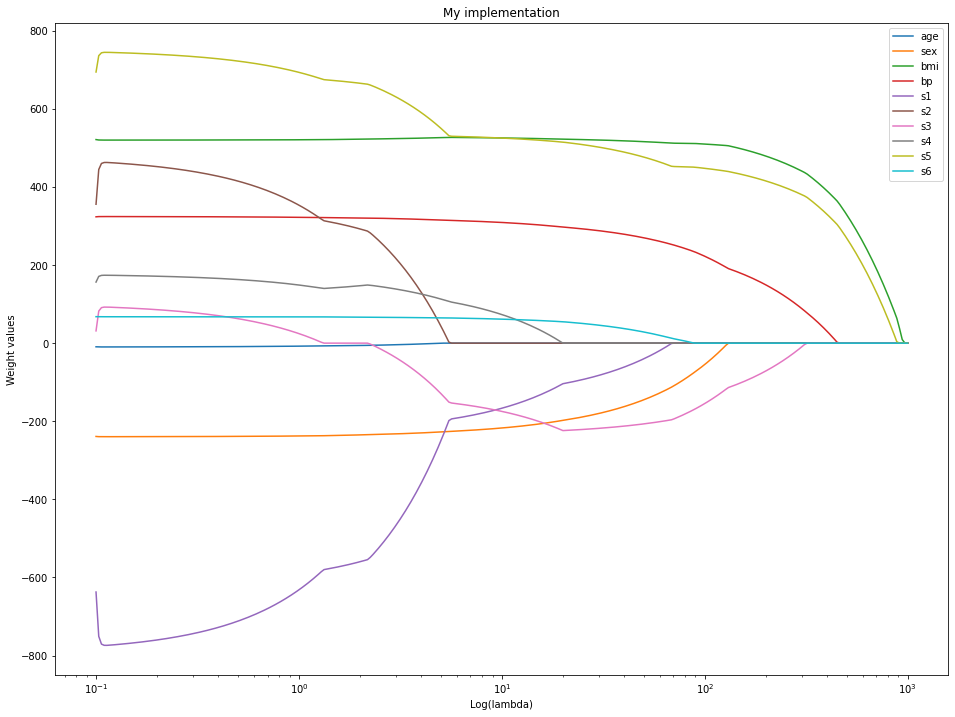

In [127]:
lamda = np.logspace(0,4,300)/10 #Range of lambda values
weightsList = []
for l in lamda:
    newWeights = lassoSGD(weights,lr, l, X,Y, epochs = 100)
    weightsList.append(newWeights)

lassoWts = np.stack(weightsList).T

n = lassoWts.shape[0]
plt.figure(figsize = (16,12))

for i in range(n):
    plt.plot(lamda, lassoWts[i], label = diabs.feature_names[i])

plt.xscale('log')
plt.xlabel('Log(lambda)')
plt.ylabel('Weight values')
plt.title('My implementation')
plt.legend()
plt.show()

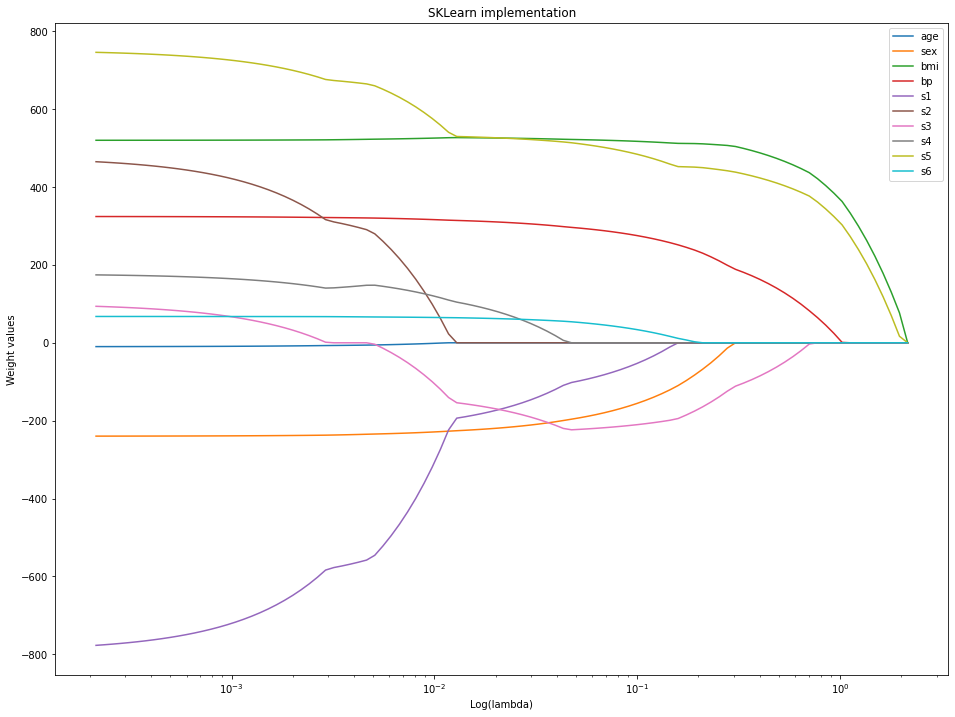

In [128]:
y = diabs.target
lambdaVals, skWeights, _ = lasso_path(X, y, eps= 1e-4, coeff_init=weights, fit_intercept=False)

# Display results
plt.figure(figsize = (16,12))

for i in range(n):
    plt.plot(lambdaVals, skWeights[i], label = diabs.feature_names[i])

plt.xscale('log')
plt.xlabel('Log(lambda)')
plt.ylabel('Weight values')
plt.title('SKLearn implementation')
plt.legend()
plt.show()